#Reconocimiento de patrones
##Regresión lineal y mínimos cuadrados

### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import ipywidgets as ipy
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.linear_model import LinearRegression

### Generación de datos
El siguiente bloque define tres bases de datos. En cada caso, el parámetro sigma controla el nivel ruido.

In [4]:
def sistema1(x,sigma = 0.5):
  a = 0.5
  b = 1
  y = a*x + b
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t

def sistema2(x,sigma = 0.05):
  a = 0.001
  b = 1
  y = a*pow(x-2,3)+b
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t

def sistema3(x,sigma=1):
  a = 0.001
  b = 0.01
  c = 0.1
  d = 5
#  y = a*np.sin(x)/x
  y = a*x**3 + b*x**2 + c*x + d
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t,y

El siguiente bloque define funciones para graficar el resultado de los modelos construidos

In [5]:
def plot_linear(input,target,predicted):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.scatter(input, target,  label='data')
  plt.plot(input, predicted, color='red',label='predicted')
  plt.xlabel('Input variable ($x$)')
  plt.ylabel('Output variable ($t$)')
  plt.legend()

  plt.subplot(1,2,2)
  plt.scatter(target, predicted)
  plt.plot([min(target),max(target)],[min(target),max(target)])
  plt.xlabel('Target ($t$)')
  plt.ylabel('Predicted ($y$)')
  plt.axis('equal')
  plt.xlim([min(target),max(target)])
  plt.ylim([min(target),max(target)])
  plt.show()

def plot_train_test(x_train,t_train,y_train,x_test,y_test):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.scatter(x_train, t_train, label="Train data")
  plt.plot(x_test, y_test, color='red', label="Predicted test")
  plt.ylim([min(t_train),max(t_train)])
  plt.legend()

  plt.subplot(1,2,2)
  plt.scatter(t_train, y_train)
  plt.plot([min(t_train),max(t_train)],[min(t_train),max(t_train)])
  plt.xlabel('Target ($t$)')
  plt.ylabel('Predicted ($y$)')
  plt.axis('equal')
  plt.xlim([min(t_train),max(t_train)])
  plt.ylim([min(t_train),max(t_train)])
  plt.show()

def plot_train_test_G(x_train,t_train,y_train,x_test,t_test,y_test,d):
  plt.figure(figsize=(5,5))

  plt.scatter(x_train, t_train, label="Train data")
  plt.plot(x_test, t_test, color='green', label="Noise free test data")
  plt.plot(x_test, y_test, color='red', label="Predicted test")
  plt.legend()
  plt.title('Degree {0}'.format(d))
  plt.xlim([min(t_train),max(t_train)])
  plt.ylim([min(t_train),max(t_train)])
  plt.show()

def plot_mse(w0, w1, X, t ):                                                    #Se crea la función que construye las gráficas.
    fig, ax = plt.subplots(1)
    y = linear_1d_predict(X,np.array([w0,w1]).reshape(-1,1))

    plt.scatter(X,t,label='Data')
    plt.scatter(X,y,label='Prediction')

    ca = plt.gca()
    for xi,ti,yi in zip(X,t,y):
        ca.add_patch(Rectangle((xi,min(ti,yi)),np.abs(ti-yi),np.abs(ti-yi),edgecolor='k',fill=None))

    plt.legend()
    plt.axis('equal')
    plt.xlabel('Input ($x$)')
    plt.ylabel('Output')
    plt.title('MSE : {}'.format(compute_mse(t,y)))
    plt.show()

El siguiente bloque define un arreglo de valores con distribución uniforme ($x$) y calcula la salida del sistema uno ($t$) para cada valor

X: (10, 1) t: (10, 1)
Number of samples: 10


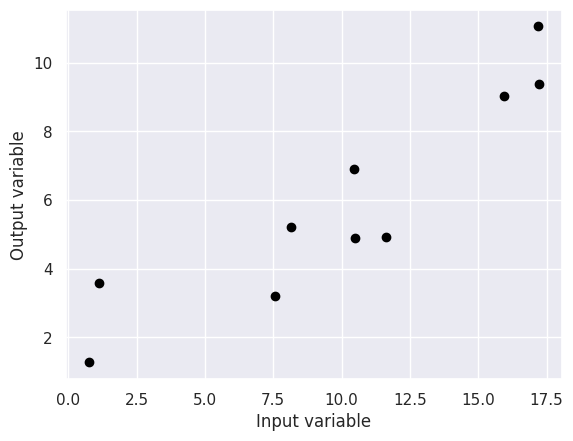

In [6]:
N = 10 # número de muestras a generar
x_init = 0
x_end = 20
X_train = np.random.uniform(x_init,x_end,(N,1))

t_train = sistema1(X_train,sigma=1)
print('X:',X_train.shape,'t:',t_train.shape)
print('Number of samples:',t_train.shape[0])

plt.scatter(X_train, t_train,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.show()

###**A.**
Use el modelo de regresión lineal descrito en clase para construir $y(x)=w_1x+w_0$.

*   Complete la función  ``` linear_1d_predict ``` siendo ```X``` un tensor de tamaño ```(N,1)``` y ```w``` un tensor de ```(2,1)```. El resultado ```y``` debe ser un tensor de ```(N,1)```. Tip: $\mathbf{y}=\mathbf{\Phi}\mathbf{w}$ y $\mathbf{\Phi}=[1 | \mathbf{X}]$

*   Complete la función  ``` compute_mse ``` siendo ```t``` e ```y``` tensores de tamaño ```(N,1)```. El resultado debe ser un escalar

In [7]:
def linear_1d_predict(X,w):
  #Reemplace el resultado de 'y' por la ecuación del modelo lineal

  y=np.random.normal(0,1,X.shape)
  return y

def compute_mse(t,y):
  #Reemplace el resultado de 'mse' por el error cuadrático medio
  mse = np.random.normal()
  return mse

In [8]:
update = lambda  w0,w1 : plot_mse(w0, w1, X_train, t_train )

display(ipy.interactive(                                                        #Se crea el tablero
    update,
    w0=ipy.FloatSlider(value=0, min=-10, max=10, step=0.1,
                    description='Bias w_0:',
                    continuous_update=True),
    w1=ipy.FloatSlider(value=1, min=-10, max=10, step=0.1,
                    description='Slope w_1:',
                    continuous_update=True,
                    style=dict(description_width='initial')),
))

interactive(children=(FloatSlider(value=0.0, description='Bias w_0:', max=10.0, min=-10.0), FloatSlider(value=…

El siguiente bloque define un arreglo de valores con distribución uniforme ($x$) y calcula la salida del sistema uno ($t$) para cada valor

X: (100, 1) t: (100, 1)
Number of samples: 100


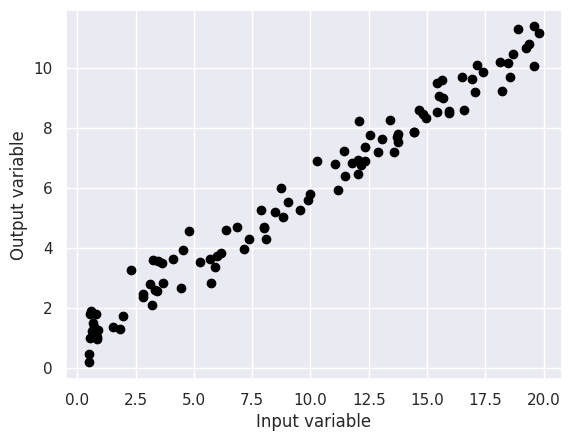

In [9]:
N = 100 # número de muestras a generar
x_init = 0
x_end = 20
X_train = np.random.uniform(x_init,x_end,(N,1))

t_train = sistema1(X_train)
print('X:',X_train.shape,'t:',t_train.shape)
print('Number of samples:',t_train.shape[0])

plt.scatter(X_train, t_train,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.show()

###**B.**
Complete la función  ``` linear_1d_fit ``` de aprendizaje de los parámetros $\mathbf{w}$ siendo ```X``` y ```t``` tensores de tamaño ```(N,1)```. El resultado ```w``` debe ser un tensor de ```(2,1)```.


¿Su regresion se ajusta bien a sus datos?

w debe ser un array de tamaño (2,1). El suyo es de tamaño (2, 1)
y debe ser un array de tamaño (100,1). El suyo es de tamaño (100, 1)


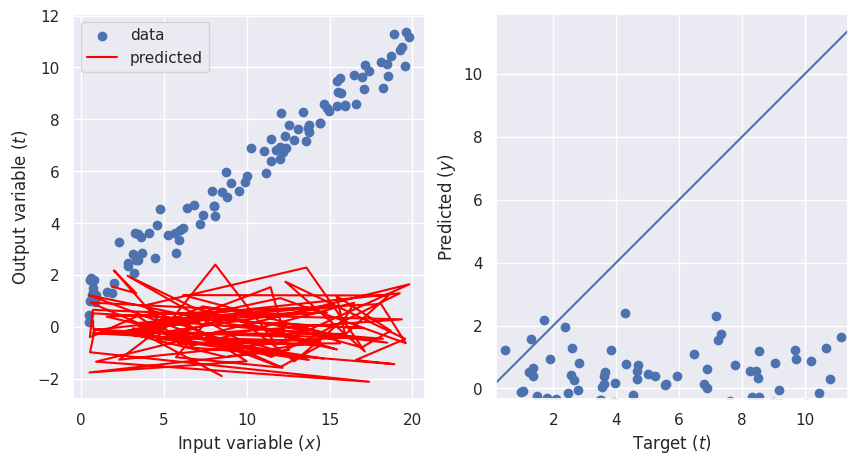

In [10]:
def linear_1d_fit(X,t):
  #Reemplace el resultado de 'w' por la solución de mínimos cuadrados para los parámetros

  w = np.random.normal(0,1,(2,1))
  return w

#Train the model
w = linear_1d_fit(X_train,t_train)
print('w debe ser un array de tamaño (2,1). El suyo es de tamaño',w.shape)

#Predict with the model
y_own = linear_1d_predict(X_train,w)
print('y debe ser un array de tamaño ({0},1). El suyo es de tamaño {1}'.format(X_train.shape[0],y_own.shape))

plot_linear(X_train,t_train,y_own)

**B.** Consulte cómo usar el regresor lineal implementado en scikit (`LinearRegression` en `linear_model`) y aplíquelo para el problema de regresión anterior. El resultado de la regresión se debe guardar en la variable `y_sk` para graficar. Compare los resultados de su implementación y del toolbox scikit.



* Qué hay en el atributo `coef_`?
* Qué hay en el atributo `intercept_`?
* Qué hace el método `score`?
* Son iguales los resultados `y_sk` y `y_own`?

w: -0.36059832146809967
w_0: -1.5985436676025027
R2: 0.38657137924632556


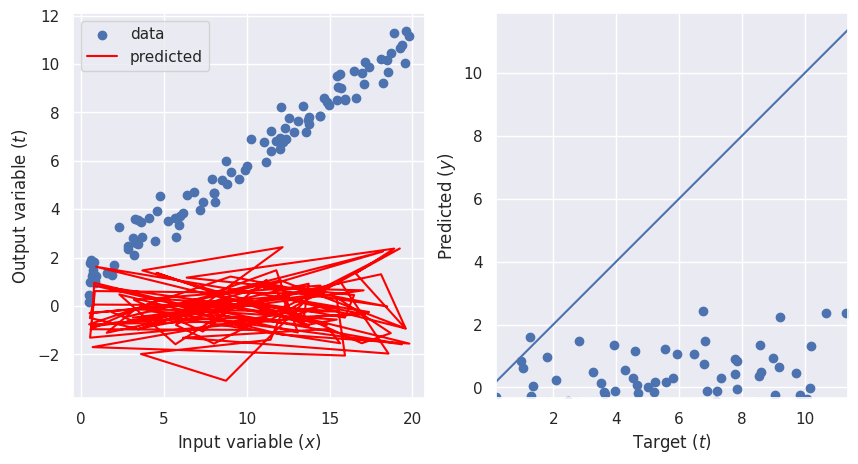

In [11]:
#Reemplace el resultado de 'y_sk' con el resultado de la predicción empleando scikit.
y_sk = y_sk = np.random.normal(0,1,X_train.shape[0])

#Reemplace el resultado de 'w_sk' por el contenido del atributo coef_ de su modelo.
w_sk = np.random.normal()

#Reemplace el resultado de 'w0_sk' por el contenido del atributo intercept_ de su modelo.
w0_sk = np.random.normal()

#Reemplace el resultado de 'score' por el resultado de invocar el método score de su modelo con 'x' y 't'.
score = np.random.rand()

print('w:',w_sk)
print('w_0:',w0_sk)
print('R2:',score)

plot_linear(X_train,t_train,y_sk)

###**C.**
El siguiente bloque define un arreglo de valores con distribución uniforme ($x$) y calcula la salida del sistema dos ($t$) para cada valor. ¿Considera que construir un regresor de la misma forma que para el sistema uno ajustaría bien las muestras?



X_train: (50, 1) t_train: (50, 1)


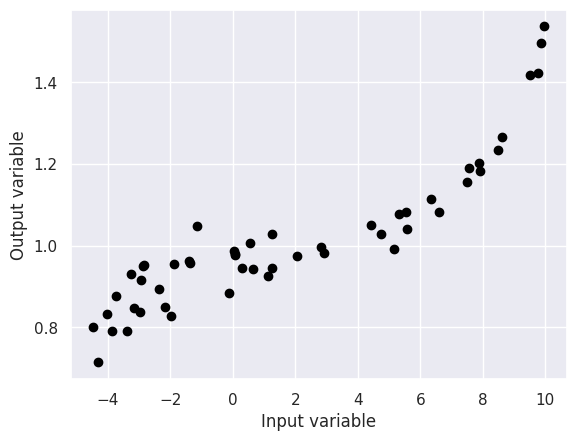

In [12]:
X_train = np.sort(np.random.uniform(-5,10,(50,1)),axis=0)
t_train = sistema2(X_train)
print('X_train:',X_train.shape,'t_train:',t_train.shape)
plt.scatter(X_train,t_train,color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.grid(True)
plt.show()

Aplique el regresor lineal de scikit para ajustar los datos del sistema dos. El resultado de la regresión se debe guardar en la variable `y_lineal` para graficar. Compare los resultados de su implementación y del toolbox scikit. ¿Su regresion se ajusta bien a sus datos?

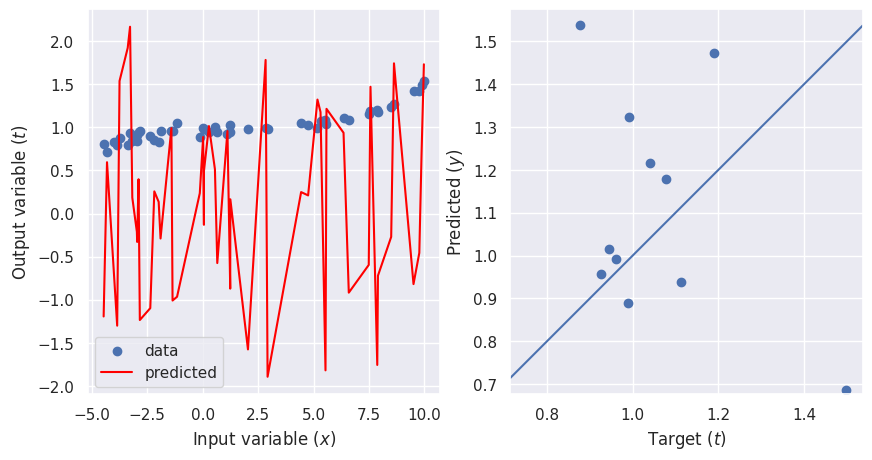

In [13]:
#%% Reemplace el resultado de 'y_lineal' por el resultado de su regresor lineal

y_lineal =  np.random.normal(0,1,X_train.shape[0])
#%%
plot_linear(X_train,t_train,y_lineal)

###**D.**

* Consulte cómo usar características polinomiales como funciones base $\phi(x)=\{x^n:n=0...P\}$,$\phi(x)\in\mathbb{R}^{P+1}$ (`PolinomialFeatures` en `sklearn.preprocessing`)
* Consulte cómo crear sistemas en cascada que concatene dos procesos secuenciales en una sóla máquina (`sklearn.pipeline.Pipeline`).
* Use un pipeline para concatenar la extracción de características polinomiales y el regresor en un único modelo.
* El resultado de la regresión se debe guardar en la variable `y_train` para graficar. ¿Mejora o no el resultado de la regresión? ¿Cómo afecta el grado del polinomio ($P$) el resultado de la regresión?

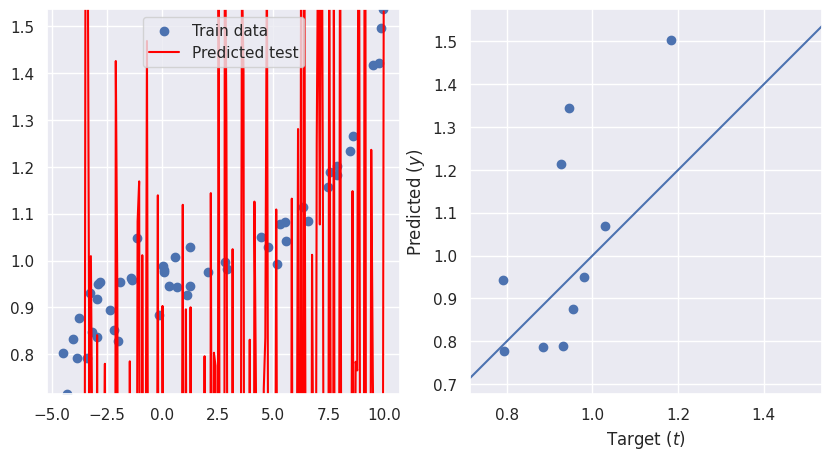

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#A continuación se crea una malla linealmente espaciada como datos de entrada de prueba:
X_test = np.linspace(-4,10,200).reshape(-1,1)

#Construya y entrene un sistema en cascada que primero extraiga características polinomiales y luego haga una regresión:

#%% Reemplace el resultado de 'y_train' por el resultado de su regresor lineal en los datos de train
y_train = np.random.normal(0,1,X_train.shape[0])

#%% Reemplace el resultado de 'y_test' por el resultado de su regresor lineal en los datos de test
y_test = np.random.normal(0,1,X_test.shape[0])

#%%
plot_train_test(X_train,t_train,y_train,X_test,y_test)

###**E.**
Consulte cómo usar funciones de base radial (RBF) como funciones base  $\phi_p(x)=\exp(-(x-\mu_p)^2/(2\sigma^2))$ (`sklearn.metrics.pairwise.rbf_kernel` y `sklearn.preprocessing.FunctionTransformer`) y aplíquelas para el problema de regresión anterior.

* Los centroides se seben guardar en la variable `mu`.
* Use un malla de valores linealmente espaciados entre el mínimo y el máximo de la variable de entrada.

* El resultado de la regresión se debe guardar en la variable `y` para graficar.

* ¿Cómo afecta la cantidad de centroides el resultado de la regresión?
* ¿Cómo afecta el parámetro escala ($\sigma$) el resultado de la regresión?  

* ¿Escogería funciones polinomiales o funciones de base radial (RBF) para este modelo de regresión?

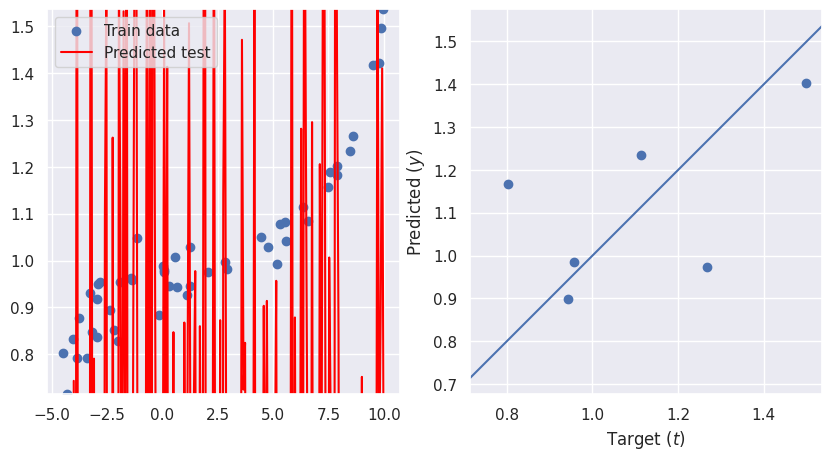

In [15]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel

#%% Reemplace el resultado de 'mu' por la malla de valores linealmente espaciados

mu = np.random.normal(0,1,5)
mu = mu.reshape(-1,1) #No elimine esta línea

#A continuación se crea una malla linealmente espaciada como datos de entrada de prueba:
X_test = np.linspace(-4,10,200).reshape(-1,1)

#Construya y entrene un sistema en cascada que primero extraiga características RBF y luego haga una regresión:

#%% Reemplace el resultado de 'y_train' por el resultado de su regresor lineal en los datos de train
y_train = np.random.normal(0,1,X_train.shape[0])

#%% Reemplace el resultado de 'y_test' por el resultado de su regresor lineal en los datos de test
y_test = np.random.normal(0,1,X_test.shape[0])

#%%
plot_train_test(X_train,t_train,y_train,X_test,y_test)

###**F.**

En el siguiente bloque se crean los datos del sistema3.


X_train: (10, 1) t_train: (10, 1)
Number of samples: 10


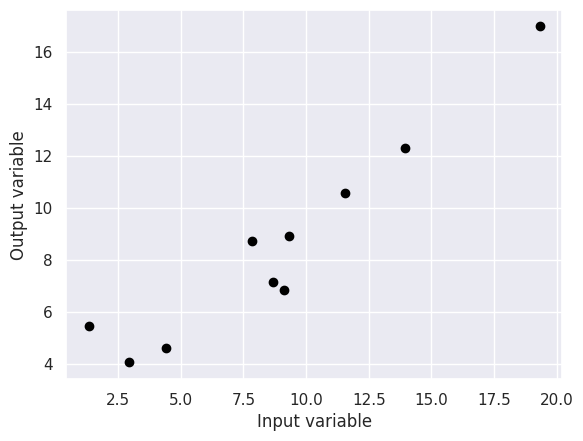

In [16]:
N = 10 # número de muestras a generar
x_init = 0
x_end = 20
X_train = np.random.uniform(x_init,x_end,(N,1))

t_train,_ = sistema3(X_train)
print('X_train:',X_train.shape,'t_train:',t_train.shape)
print('Number of samples:',t_train.shape[0])

plt.scatter(X_train, t_train,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.grid(True)
plt.show()

Realice una regresión lineal con bases polinomiales usando $P\in\{1,5,10,15,20,25\}$. Entrene los diferentes modelos con las variables $x$ y $y$, estime las salidas para `X_test` y guarde esta como `y_test`. Para cada caso visualice el modelo estimado, el modelo real y las muestras utilizadas para el entrenamiento. ¿Qué sucede cuando P crece?. ¿Mejora la regresión cuando sube el número de bases?

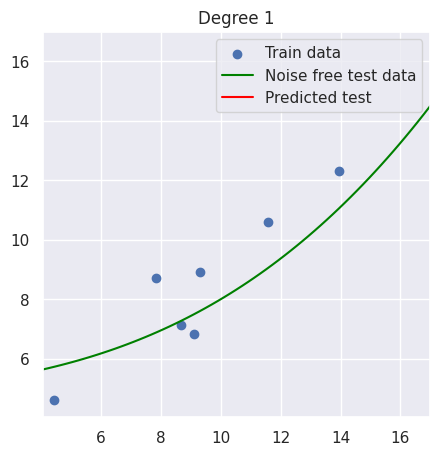

In [17]:
X_test = np.linspace(x_init, x_end, 100).reshape(-1,1)
_,t_test = sistema3(X_test,sigma=1)

#Reemplace los elementos de la lista 'degrees' por la lista de grados del polinomio a evaluar
degrees = [1]

for degree in degrees:

  # A continuación cree su modelo de regresión, prediga el resultado para los
  # datos de train y test, y reemplacelos en  'y_train' y 'y_test'.
  # NOTA: Use la variable 'degree' para el grado del polinomio

  y_train = np.random.normal(0,1,X_train.shape[0])
  y_test = np.random.normal(0,1,X_test.shape[0])

  #%%
  plot_train_test_G(X_train,t_train,y_train,X_test,t_test,y_test,degree)

###**H. TAREA EN CASA**
Cargue los datos `california_housing_train` y `california_housing_test`. Entrene un modelo lineal de scikit-learn con los datos de train para predecir la variable `median_house_value` a partir de las otras 8 variables. Evalúe la calidad de su regresor usando los datos de test.

El modelo debe tener en cascada tres procesos:

* Normalización con `sklearn.preprocessing.StandardScaler`.
* Extracción de características con `sklearn.preprocessing.PolinomialFeatures` o `sklearn.preprocessing.FunctionTransformer`.
* Regresor lineal regularizado (`sklearn.linear_model.Lasso`, `sklearn.linear_model.Ridge` o `sklearn.linear_model.ElasticNet`).

El modelo debe tener validación cruzada para ajustar el $\gamma$ de la RBF o el orden del polinomio y el/los factores de regularización.



Ayudas:

*   Consulte los métodos `predict` y `score`.
*   Haga un `scatter` de las salidas esperadas contra las predicciones.



In [19]:
df_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

X_train = df_train.drop(columns=['median_house_value'])
t_train = df_train['median_house_value']

X_test = df_test.drop(columns=['median_house_value'])
t_test = df_test['median_house_value']


print (df_train)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

**TIP**: El siguiente bloque explica la creación de centroides multidimensionales

In [20]:
#Para tres dimensiones, se construye una lista de valores para cada eje:
x1 = np.linspace(-1,1,3)
x2 = np.linspace(-8,8,5)
x3 = np.linspace(10,26,5)
print(x1.shape,x2.shape,x3.shape)

#El método meshgrid combina todos los valores de cada eje creando una malla:
X1,X2,X3 = np.meshgrid(x1,x2,x3)

#Cada X contiene las coordenadas de los puntos en la malla para su coordenada correspondiente:
print(X1.shape,X2.shape,X3.shape)

#Se concatenan las coordenadas en un único arreglo que actúe como la posición de los centroides:
mu = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1),X3.reshape(-1,1)),axis=1)
print(mu.shape)
print(mu)

(3,) (5,) (5,)
(5, 3, 5) (5, 3, 5) (5, 3, 5)
(75, 3)
[[-1. -8. 10.]
 [-1. -8. 14.]
 [-1. -8. 18.]
 [-1. -8. 22.]
 [-1. -8. 26.]
 [ 0. -8. 10.]
 [ 0. -8. 14.]
 [ 0. -8. 18.]
 [ 0. -8. 22.]
 [ 0. -8. 26.]
 [ 1. -8. 10.]
 [ 1. -8. 14.]
 [ 1. -8. 18.]
 [ 1. -8. 22.]
 [ 1. -8. 26.]
 [-1. -4. 10.]
 [-1. -4. 14.]
 [-1. -4. 18.]
 [-1. -4. 22.]
 [-1. -4. 26.]
 [ 0. -4. 10.]
 [ 0. -4. 14.]
 [ 0. -4. 18.]
 [ 0. -4. 22.]
 [ 0. -4. 26.]
 [ 1. -4. 10.]
 [ 1. -4. 14.]
 [ 1. -4. 18.]
 [ 1. -4. 22.]
 [ 1. -4. 26.]
 [-1.  0. 10.]
 [-1.  0. 14.]
 [-1.  0. 18.]
 [-1.  0. 22.]
 [-1.  0. 26.]
 [ 0.  0. 10.]
 [ 0.  0. 14.]
 [ 0.  0. 18.]
 [ 0.  0. 22.]
 [ 0.  0. 26.]
 [ 1.  0. 10.]
 [ 1.  0. 14.]
 [ 1.  0. 18.]
 [ 1.  0. 22.]
 [ 1.  0. 26.]
 [-1.  4. 10.]
 [-1.  4. 14.]
 [-1.  4. 18.]
 [-1.  4. 22.]
 [-1.  4. 26.]
 [ 0.  4. 10.]
 [ 0.  4. 14.]
 [ 0.  4. 18.]
 [ 0.  4. 22.]
 [ 0.  4. 26.]
 [ 1.  4. 10.]
 [ 1.  4. 14.]
 [ 1.  4. 18.]
 [ 1.  4. 22.]
 [ 1.  4. 26.]
 [-1.  8. 10.]
 [-1.  8. 14.]
 [-1.  8. 18.]
 [

## normalizacion tarea



In [25]:
from sklearn.preprocessing import StandardScaler

escala= StandardScaler()
#escalado de  datos

X_train_escalado= escala.fit_transform(X_train)
X_test_escalado=escala.transform(X_test)


print(X_train_escalado)

[[ 2.619365   -0.67152023 -1.07967114 ... -0.36118401 -0.07599796
  -1.25254316]
 [ 2.53956878 -0.57326437 -0.76187201 ... -0.26186523 -0.09940441
  -1.08148298]
 [ 2.4946834  -0.90546278 -0.92077158 ... -0.95535424 -0.99925206
  -1.17010515]
 ...
 [-2.36291168  2.90780067 -0.92077158 ... -0.16167524 -0.11760942
  -0.44666313]
 [-2.36291168  2.88908527 -0.76187201 ... -0.1146295  -0.06039367
  -0.99778717]
 [-2.387848    2.29955006  1.85997083 ... -0.54326844 -0.60134255
  -0.45536288]]


## extraccion  de caracteristicas polinomiales


In [22]:
from sklearn.preprocessing import PolynomialFeatures

polinom = PolynomialFeatures(degree=2)
X_train_polinom = polinom.fit_transform(X_train_escalado)
X_test_polinom = polinom.transform(X_test_escalado)


## regresion regularizada

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

# Definir el modelo
model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)

# se define  el maximo de  iteraciones ya que las que  estan por defecto no son suficientes para evaluar el modelo
# Entrenar el modelo con validación cruzada
scores = cross_val_score(model, X_train_polinom, t_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

# Ajustar el modelo al conjunto de entrenamiento
model.fit(X_train_polinom, t_train)


Cross-validation scores: [0.14206837 0.58429001 0.54899802 0.54744593 0.41059987]
Mean cross-validation score: 0.4466804399651897


ElasticNet(alpha=0.1, max_iter=10000)

## evaluacion del modelo

el error es : 4665281866.176566
[344723.55784471 214516.24154093 279579.72728713 ... 126413.59993131
 153166.36831644 445421.2698721 ]


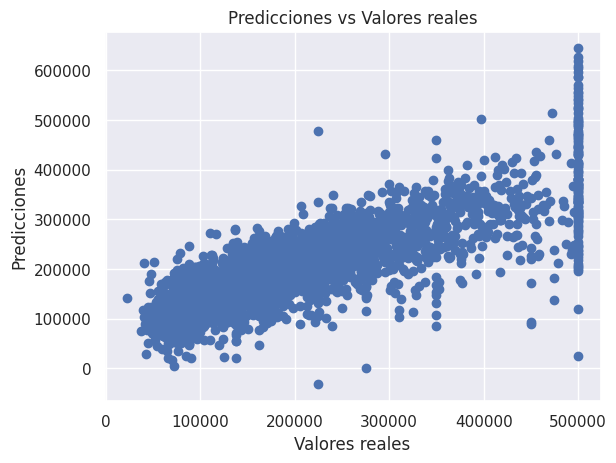

In [26]:
from sklearn.metrics import mean_squared_error

t_predic= model.predict(X_test_polinom)

error = mean_squared_error(t_test,t_predic)

print ("el error es :" ,error )

plt.scatter(t_test, t_predic)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()